Modelo de Machine Learning - Regresión Lineal  

La regresión lineal es un método de aprendizaje automático supervisado utilizado por la herramienta Entrenar con AutoML y busca una ecuación lineal que describe mejor la correlación de las variables explicativas con la variable dependiente. Se logra ajustando una línea a los datos mediante mínimos cuadrados.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el CSV de entrenamiento
train_df = pd.read_csv('train.csv')

# Imprimir la cabecera del conjunto de entrenamiento original
print("Cabecera de train.csv:")
print(train_df.head())

# Eliminar la columna 'Id' (si existe) ya que no se usará para el modelado
if 'Id' in train_df.columns:
    train_df.drop('Id', axis=1, inplace=True)

# Separar columnas numéricas y categóricas
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

# Imputar valores faltantes:
# Para las variables numéricas se usa la media
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].mean())
# Para las variables categóricas se reemplazan los NaN por "Missing"
train_df[cat_cols] = train_df[cat_cols].fillna("Missing")

# Convertir variables categóricas a variables dummy (one-hot encoding)
# Se utiliza drop_first=True para evitar la multicolinealidad
train_df = pd.get_dummies(train_df, drop_first=True)

# Imprimir la cabecera del conjunto de entrenamiento preprocesado
print("\nCabecera de train_df preprocesado:")
print(train_df.head())

# Separar la variable dependiente 'SalePrice' de las independientes
X_train_full = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

# Crear y ajustar un imputador sobre X_train_full (en caso de que aún queden NaN)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_full),
                               columns=X_train_full.columns)

# (Opcional) Puedes dividir en entrenamiento/validación para evaluar el modelo
#from sklearn.model_selection import train_test_split
#X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_imputed, y_train,
#                                                              test_size=0.2,
#                                                              random_state=42)

# Entrenar el modelo con todos los datos de entrenamiento
modelo = LinearRegression()
modelo.fit(X_train_imputed, y_train)

# Evaluar el modelo en el conjunto de entrenamiento (o validación si se ha dividido)
y_train_pred = modelo.predict(X_train_imputed)
print("\nMSE en entrenamiento:", mean_squared_error(y_train, y_train_pred))
print("R² en entrenamiento:", r2_score(y_train, y_train_pred))


Cabecera del dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  

   PredictedSalePrice
0        1.078931e+06
1        1.110491e+06
2        1.143380e+06
3        1.148901e+06
4        1.168806e+06


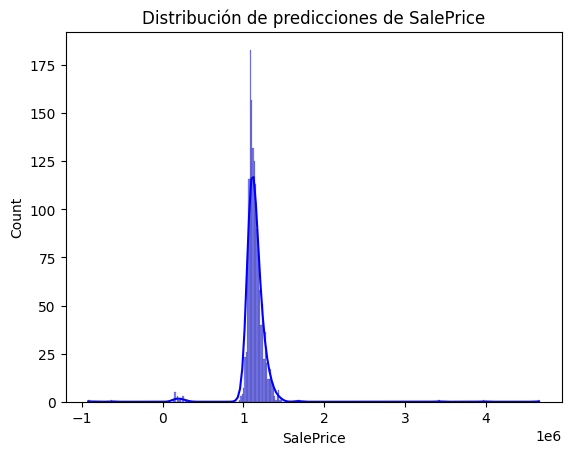

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# 1. Cargar el archivo test.csv
data_test = pd.read_csv('test.csv')

# 2. Eliminar la columna 'Id' si existe
if 'Id' in data_test.columns:
    data_test = data_test.drop('Id', axis=1)

# 3. Manejar valores faltantes: para numéricas y categóricas, igual que en el entrenamiento
num_cols_test = data_test.select_dtypes(include=['int64', 'float64']).columns
cat_cols_test = data_test.select_dtypes(include=['object']).columns

data_test[num_cols_test] = data_test[num_cols_test].fillna(data_test[num_cols_test].mean())
data_test[cat_cols_test] = data_test[cat_cols_test].fillna("Missing")

# 4. Convertir variables categóricas a variables dummy
data_test_dummies = pd.get_dummies(data_test, drop_first=True)

# 5. Alinear las columnas del test con las del entrenamiento
# Aquí X.columns corresponde a las columnas del DataFrame X que se usó en el entrenamiento (después de dummies)
data_test_dummies = data_test_dummies.reindex(columns=X.columns, fill_value=0)

# 6. Aplicar el imputador entrenado (no crear uno nuevo)
data_test_imputed = pd.DataFrame(imputer.transform(data_test_dummies),
                                 columns=data_test_dummies.columns)

# 7. Realizar las predicciones con el modelo entrenado
predicciones = modelo.predict(data_test_imputed)

# 8. Agregar las predicciones al DataFrame test y visualizarlas
data_test['PredictedSalePrice'] = predicciones
print(data_test[['PredictedSalePrice']].head())

# Opcional: visualizar la distribución de las predicciones
sns.histplot(predicciones, kde=True, color="blue")
plt.title("Distribución de predicciones de SalePrice")
plt.xlabel("SalePrice")
plt.show()


In [ ]:
# Cargar el CSV de test
test_df = pd.read_csv('test.csv')

# Imprimir la cabecera del conjunto de test original
print("\nCabecera de test.csv:")
print(test_df.head())

# Eliminar la columna 'Id' (si existe)
if 'Id' in test_df.columns:
    test_df.drop('Id', axis=1, inplace=True)

# Identificar columnas numéricas y categóricas en el test
num_cols_test = test_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols_test = test_df.select_dtypes(include=['object']).columns

# Imputar valores faltantes en el test:
test_df[num_cols_test] = test_df[num_cols_test].fillna(test_df[num_cols_test].mean())
test_df[cat_cols_test] = test_df[cat_cols_test].fillna("Missing")

# Convertir variables categóricas a variables dummy
test_df = pd.get_dummies(test_df, drop_first=True)

# Imprimir la cabecera del test después de convertir a dummies
print("\nCabecera de test_df preprocesado (antes de alinear columnas):")
print(test_df.head())
